In [1]:
import WebNLG_xmlReader.benchmark_reader as xml_reader
import os.path
import pickle
import pandas as pd
import numpy as np
import re
import tensorflow as tf

from pathlib import Path

from matplotlib import gridspec
import matplotlib.pyplot as plt

# Dataset Cleaning and Preperations

CACAPO contains data for both pipeline and neural end-to-end structures. As this project only focuses on E2E models, we will not need a majority of the data. The code below extracts the data and makes it easier to retrieve for model fine-tuning

In [2]:
# For initial fine-tuning
combined_train_dataset = [
                '../Data/CACAPO/en/Incidents/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/en/Sports/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/en/Stocks/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/en/Weather/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Incidents/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Sports/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Stocks/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Weather/WebNLGFormatTrain.xml']

combined_dev_dataset = [
                '../Data/CACAPO/en/Incidents/WebNLGFormatDev.xml', 
                '../Data/CACAPO/en/Sports/WebNLGFormatDev.xml', 
                '../Data/CACAPO/en/Stocks//WebNLGFormatDev.xml', 
                '../Data/CACAPO/en/Weather/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Incidents/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Sports/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Stocks/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Weather/WebNLGFormatDev.xml']

combined_test_dataset = [
                '../Data/CACAPO/en/Incidents/WebNLGFormatTest.xml', 
                '../Data/CACAPO/en/Sports/WebNLGFormatTest.xml', 
                '../Data/CACAPO/en/Stocks/WebNLGFormatTest.xml', 
                '../Data/CACAPO/en/Weather/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Incidents/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Sports/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Stocks/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Weather/WebNLGFormatTest.xml']


# For Continous learning testing
split_per_subject_train_dataset = [
                ['../Data/CACAPO/en/Incidents/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Incidents/WebNLGFormatTrain.xml'], 
                ['../Data/CACAPO/en/Sports/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Sports/WebNLGFormatTrain.xml'], 
                ['../Data/CACAPO/en/Stocks/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Stocks/WebNLGFormatTrain.xml'], 
                ['../Data/CACAPO/en/Weather/WebNLGFormatTrain.xml', 
                '../Data/CACAPO/nl/Weather/WebNLGFormatTrain.xml']]

split_per_subject_dev_dataset = [
                ['../Data/CACAPO/en/Incidents/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Incidents/WebNLGFormatDev.xml'],
                ['../Data/CACAPO/en/Sports/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Sports/WebNLGFormatDev.xml'], 
                ['../Data/CACAPO/en/Stocks//WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Stocks/WebNLGFormatDev.xml'], 
                ['../Data/CACAPO/en/Weather/WebNLGFormatDev.xml', 
                '../Data/CACAPO/nl/Weather/WebNLGFormatDev.xml']] 
                
split_per_subject_test_dataset = [
                ['../Data/CACAPO/en/Incidents/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Incidents/WebNLGFormatTest.xml'],
                ['../Data/CACAPO/en/Sports/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Sports/WebNLGFormatTest.xml'],
                ['../Data/CACAPO/en/Stocks/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Stocks/WebNLGFormatTest.xml'],
                ['../Data/CACAPO/en/Weather/WebNLGFormatTest.xml', 
                '../Data/CACAPO/nl/Weather/WebNLGFormatTest.xml']]                 


Incident_set = [split_per_subject_train_dataset[0], split_per_subject_dev_dataset[0], split_per_subject_test_dataset[0]]
Sport_set = [split_per_subject_train_dataset[1], split_per_subject_dev_dataset[1], split_per_subject_test_dataset[1]]
Stock_set = [split_per_subject_train_dataset[2], split_per_subject_dev_dataset[2], split_per_subject_test_dataset[2]]
Weather_set = [split_per_subject_train_dataset[3], split_per_subject_dev_dataset[3], split_per_subject_test_dataset[3]]

all_data = [combined_train_dataset, combined_dev_dataset, combined_test_dataset]

In [15]:
# create instance of benchmark class to transform xml
train_instance =  xml_reader.Benchmark()
dev_instance =  xml_reader.Benchmark()
test_instance =  xml_reader.Benchmark()

def transform_data(data):
    """
    This function calls the xml_reader code to transform the xml into a more suitable code version to use.
    The function takes in the 3 different datasets, which it then transforms and collects into usable variables.
    """
    labels = ["Train", "Dev", "Test"]
    #loop through the different datasets groups and transform the xml into usable code
    for iteration, datasets in enumerate(data):
        #choose the right files
        files = xml_reader.select_files(datasets)
        
        #For each datasplit, transform the xml and store the transformation into a usable variable
        # try:
        #     if datasets == combined_train_dataset:
        #         train_instance.fill_benchmark(files)
        #     elif datasets == combined_dev_dataset:
        #         dev_instance.fill_benchmark(files)
        #     elif datasets == combined_test_dataset:
        #         test_instance.fill_benchmark(files)


        try:
            if datasets == Weather_set[0]:
                train_instance.fill_benchmark(files)
            elif datasets == Weather_set[1]:
                dev_instance.fill_benchmark(files)
            elif datasets == Weather_set[2]:
                test_instance.fill_benchmark(files)
            
            print(f'Completed the transformation of the {labels[iteration]} datasets \n')
        except:
            print("Error: The proper datasets have not been found. Please check that all dataset splits are available")
    
    return train_instance, dev_instance, test_instance


def total_data_check(data_instance, iteration):
    labels = ['Train', 'Dev', 'Test']
    print(f"Number of entries: in {labels[iteration]}:      {data_instance.entry_count()} ") 
    print(f"Number of texts: in {labels[iteration]}:      {data_instance.total_lexcount()} ")
    print(f"Number of distinct properties in {labels[iteration]}:      {len(list(data_instance.unique_p_mtriples()))}")
    print("\n")
    return data_instance.entry_count()

    
def single_entry_check(data_instance):
    
    for entry in data_instance.entries:
        #print(f'entry.id        {entry.id}')
        if entry.id == 'Id1':
            print(f"Info about {entry.id} in category '{entry.category}' in size '{entry.size}':")
            print("# of lexicalisations", entry.count_lexs())
            print("Properties: ", entry.relations())
            print("RDF triples: ", entry.list_triples())
            print("Subject:", entry.modifiedtripleset.triples[0].s)
            print("Predicate:", entry.modifiedtripleset.triples[0].p)
            print("Lexicalisation:", entry.lexs[0].lex)
            #print("Another lexicalisation:", entry.lexs[1].lex)
            if entry.dbpedialinks:
                # dbpedialinks is a list where each element is a Triple instance
                print("DB link, en:", entry.dbpedialinks[0].s)  # subject in English

            print("Article text", entry.lexs[0].return_text()) 
            

def extract_data(data_instance):
    RDF_set, text_set = [], []

    for entry in data_instance.entries:
        RDF_set.append(entry.list_triples())
        text_set.append(entry.lexs[0].return_text())

    return RDF_set, text_set 


def clean_text(data):
    text_set = data.copy()
    for iteration, article in enumerate(data):
        text_set[iteration] = re.sub('\\n|', '', article)

    return text_set

def create_dataframe(input_data, output_data):
    
    dataframe = pd.DataFrame({'input': input_data, 'output': output_data})
    return dataframe

def write_to_csv(data, iteration):
    """
    Data = dataset
    Iteration = iteration to determine the dataset split
    data_type = is the dataset RDF or text
    """
    labels = ['Train', 'Dev', 'Test']

    if isinstance(data, pd.DataFrame):
        print(f'data is a dataframe')

    try:
        print("Entered try check")
        if (os.path.exists(f'E:/ArriaThesis/MscThesis/Data/Cleaned_Continuous/Weather/{labels[iteration]}') == False) :
            save_path = 'E:/ArriaThesis/MscThesis/Data/Cleaned_Continuous/Weather/' 
            name_of_file = f'{labels[iteration]}'
            output_file = os.path.join(save_path,f'{name_of_file}.csv')
            data.to_csv(output_file, index=False)
    except:
        print(f'file for {labels[iteration]} already exists')

def read_csv_file(file_name):
    file_path = f"../Data/Cleaned_data/{file_name}.csv"
    dataset = pd.read_csv(file_path)
    return dataset

def dataset_check(transformed_datasets):
    """
    Determines the number of entries per category per dataset split. 
    Input: the transformed datasets containing the xml data
    Output: Entry_checks: entry counts per category per data split
            Entry_categories: list of categories that CACAPO contains
            Total_entry_count: Total amount of entries per dataset split
    """
    ## sets them up in a list to loop over each
    combined_transformation = transformed_datasets
    split = ["Train", "Val", "Test"]
    #entry_categories = ['DutchIncidents', 'DutchSports', 'DutchStocks', 'DutchWeather', 'EnglishIncidents', 'EnglishSports', 'EnglishStocks', 'EnglishWeather']

    #entry_categories = ['DutchIncidents', 'EnglishIncidents']
    #entry_categories = ['DutchSports', 'EnglishSports']
    #entry_categories = ['DutchStocks','EnglishStocks']
    entry_categories = ['DutchWeather', 'EnglishWeather']

    train_entries, val_entries, test_entries = [], [], []
    # list to store the entry counts per category per data split
    entry_checks = [train_entries, val_entries, test_entries]
    total_entry_count = []

    for dataset_iteration, dataset_split in enumerate(combined_transformation):
        total_entry_count.append(total_data_check(dataset_split, dataset_iteration))
        for category in entry_categories:
            # calculate the number of entries in benchmark per category
            entry_length = dataset_split.entry_count(cat=category) 
            # save the number of entries per category per split
            entry_checks[dataset_iteration].append(entry_length)
            print(f' category:  {category},     entry_length:   {entry_length}')
        print(f' Split   {split[dataset_iteration]}              sum(entry_checks): {sum(entry_checks[dataset_iteration])}   \n\n')

    return entry_checks, entry_categories, total_entry_count


def plot_dataset_distributions(entries, entry_categories, total_entries):
    """
    This function plots the category distributions for train, validation, and test.
    Inputs: 
        Entries:          Extracted entries (an xml_reader instance)
        Entry_categories: A list of categories
        Total_entries:    A summary count of total entries per dataset split
    Output: 3 Pieplots of category distributions
    """
    print(total_entries)
    #print(total_noise)
    #noise_percentage = len(total_noise)/total_entries

    labels = entry_categories
    colors = ['tab:blue', 'tab:cyan', 'tab:pink', 'tab:orange', 'tab:red', 'tab:green', 'tab:purple', 'tab:olive' ]

    gs = gridspec.GridSpec(2, 2)
    gs.update(wspace = 0.25, hspace = 0.5)
    plt.figure(figsize=(15,10))

    ax1 = plt.subplot(gs[0, 0])
    ax1.pie(entries[0],  labels = labels, colors = colors,autopct='%.0f%%')
    ax1.set_title('Split of Categories Trainset', fontsize = 15)

    ax2 = plt.subplot(gs[0, 1], sharex=ax1)
    ax2.pie(entries[1],  labels = labels, colors = colors,autopct='%.0f%%')
    ax2.set_title('Split of Categories Validation Set', fontsize = 15)

    ax3 = plt.subplot(gs[1, 0], sharex=ax1)
    ax3.pie(entries[2],  labels = labels, colors = colors,autopct='%.0f%%')
    ax3.set_title('Split of Categories Testset', fontsize = 15)

    ax4 = plt.subplot(gs[1, 1], sharex=ax1)
    ax4.pie(total_entries,  labels = ["Train", "Validation", "Test"], colors = ['tab:blue', 'tab:red', 'tab:green',],autopct='%.0f%%')
    ax4.set_title('Dataset Distribution', fontsize = 15)

    plt.show()


def camel_case_split(str):
     
    start_idx = [i for i, e in enumerate(str)
                 if e.isupper()] + [len(str)]
 
    start_idx = [0] + start_idx
    return [str[x: y] for x, y in zip(start_idx, start_idx[1:])]

def noise_check(RDF_set, Text_set):
    
    noise = []

    for rdf_iteration, rdf_input in enumerate(RDF_set):
        #print(f'rdf_input:  {rdf_input}')
        for rdf in rdf_input:
            split_RDF = rdf.split(" | ")

            #certain attributes have boolean values as attribute values, and the article contains the attribute as text. 
            # So we need to check for this boolean and check if the attribute is in the article
            if split_RDF[1] == "True":

                attribute_value = camel_case_split(split_RDF[0])
                attribute_value = ' '.join(attribute_value)
                #hi = 5

            else:
                # a CACAPO RDF is set as A | B. Here A is attribute, and B is the value in the article
                attribute_value = split_RDF[1]

            # replace a subscript from the attribute, so that we can check if it is in the actual article
            if '_' in attribute_value:
                attribute_value = attribute_value.replace('_', ' ')

            if attribute_value not in Text_set[rdf_iteration]:
                noise.append((attribute_value, rdf, rdf_input, Text_set[rdf_iteration]))

    return noise


def Overal_function(data):
    transformed_train, transformed_dev, transformed_test = transform_data(data)
    combined_transformation = [transformed_train, transformed_dev, transformed_test]
    entries, entry_categories, total_entries = dataset_check(combined_transformation)
    
    total_noise= []
    RDF_text_datasets =[]

    for iteration, dataset in enumerate(combined_transformation):

       RDF_set, Text_set = extract_data(dataset)

       print(f'len(RDF_Set[0]: {len(RDF_set[0])}')

       clean_text_set = clean_text(Text_set)
       total_noise.append(len(noise_check(RDF_set, Text_set)))
       data_dataframe = create_dataframe(RDF_set, clean_text_set)
      
       write_to_csv(data_dataframe, iteration)
       print("\n\n\n")
    
    print(f'Set group: [Train, Validation, Test], Total noise in dataset: {total_noise}, Total entries in dataset: {total_entries}')
            
    #plot_dataset_distributions(entries, entry_categories, total_entries)

In [16]:
Overal_function(Weather_set)

Completed the transformation of the Train datasets 

Completed the transformation of the Dev datasets 

Completed the transformation of the Test datasets 

Number of entries: in Train:      3848 
Number of texts: in Train:      3848 
Number of distinct properties in Train:      3614


 category:  DutchWeather,     entry_length:   2014
 category:  EnglishWeather,     entry_length:   1834
 Split   Train              sum(entry_checks): 3848   


Number of entries: in Dev:      471 
Number of texts: in Dev:      471 
Number of distinct properties in Dev:      851


 category:  DutchWeather,     entry_length:   244
 category:  EnglishWeather,     entry_length:   227
 Split   Val              sum(entry_checks): 471   


Number of entries: in Test:      792 
Number of texts: in Test:      792 
Number of distinct properties in Test:      1179


 category:  DutchWeather,     entry_length:   410
 category:  EnglishWeather,     entry_length:   382
 Split   Test              sum(entry_checks): 792

Completed the transformation of the Train datasets 

Completed the transformation of the Dev datasets 

Completed the transformation of the Test datasets 

Number of entries: in Train:      15290 
Number of texts: in Train:      15290 
Number of distinct properties in Train:      18190


 category:  DutchIncidents,     entry_length:   1116
 category:  DutchSports,     entry_length:   1945
 category:  DutchStocks,     entry_length:   2292
 category:  DutchWeather,     entry_length:   2014
 category:  EnglishIncidents,     entry_length:   1025
 category:  EnglishSports,     entry_length:   3415
 category:  EnglishStocks,     entry_length:   1649
 category:  EnglishWeather,     entry_length:   1834
 Split   Train              sum(entry_checks): 15290   


Number of entries: in Dev:      1831 
Number of texts: in Dev:      1831 
Number of distinct properties in Dev:      3540


 category:  DutchIncidents,     entry_length:   123
 category:  DutchSports,     entry_length:   250
 category:  

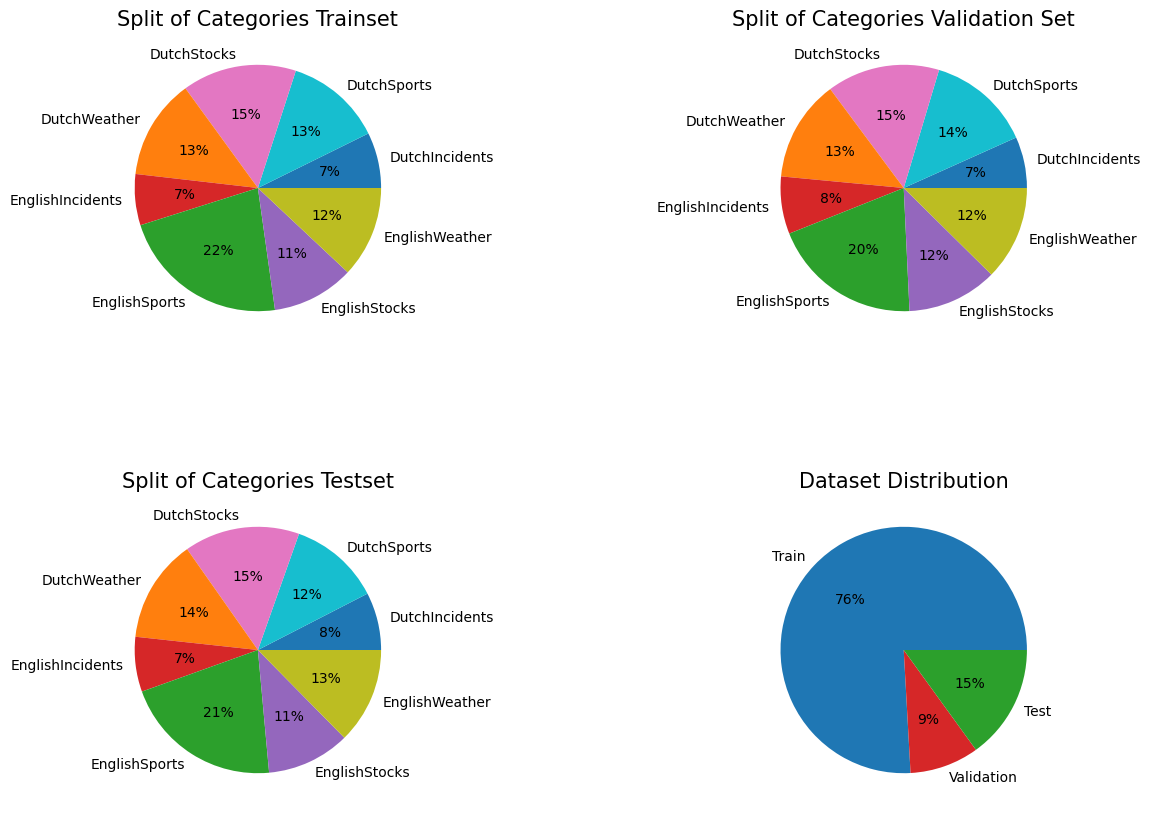

In [8]:
Overal_function(all_data)